In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras import layers


In [ ]:
(train_datasets,test_datasets)=tfds.load(name="imdb_reviews",split=['train','test'],shuffle_files=True,as_supervised=True)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteZG3O9J/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteZG3O9J/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteZG3O9J/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
for text,label in train_datasets.take(1):
  print("Text : ",text.numpy())
  print("Label: ",label.numpy())

Text :  b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
Label:  0


In [ ]:
BUFFER_SIZE=10000
BATCH_SIZE=64
train_datasets=train_datasets.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_datasets = test_datasets.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


In [ ]:
for text,label in train_datasets.take(1):
  print("Text: ",text.numpy()[:3])
  print("Label: ",label.numpy()[:3])



Text:  [b"Looking at some of the negative posts, you really have to wonder what some people do for fun....<br /><br />I was lucky enough to see the film during its all-too-brief theatrical run. The audience laughed its heads off. I'm watching a tape of it as I type and it's still dang funny!<br /><br />It's also got a sweet side, with unexpected turns of genuine pathos. The late, great Royal Dano is especially effective as the lonely, down-on-his-luck farmer Wrenchmuller. Ariana Richards and J.J. Anderson are great as the lead kids. And the actors in the Martian suits, although limited to mime, do a great job<br /><br />Another thing to look for is the background details. The film is full of homages, pastiches, and references to other SF and fantasy films. Take a look at the Martian costumes next time. One of them is wearing a Marty McFly costume, another is a Ghostbuster, a third is in a House Atreides uniform, and a fourth is wearing a Last Starfighter flightsuit."
 b'Savage Island (

In [ ]:
VOCAB_SIZE=1000
encoder=TextVectorization(max_tokens=VOCAB_SIZE,)
encoder.adapt(train_datasets.map(lambda text,label:text))


In [ ]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
stopwords=stopwords.words()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import numpy as np
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it', 'i',
       'this', 'that', 'br', 'was', 'as', 'for', 'with', 'movie', 'but'],
      dtype='<U14')

In [ ]:
for example, label in train_datasets.take(1):
  print('texts: ', example.numpy()[:3])
  print()
  print('labels: ', label.numpy()[:3])
  encoded_example = encoder(example)[:3].numpy()

  for n in range(3):
    print("Original: ", example[n].numpy())
    print("Round-trip: ", " ".join(vocab[encoded_example[n]]))
    print()




texts:  [b"This movie is some of the worst crap I have ever seen. I literally got a sharp pain in my head while watching this movie. The CGI was awful, and the story was just a waste of ink. Dean Cain's character was Mr-Super-Intuitive-I-can-figure-out-anything, except he can't seem to work his own helicopter correctly. The biggest problem was the split screen camera work. I felt like I was watching the Brady Bunch or something, only it wasn't different people in the boxes, just close ups and different views of the same thing. I can only figure that the actors really needed the money, because this movie wasn't worth the film it was shot on."
 b'I can see where the film makers were going with this. But they never really reach their destination. It\'s supposed to be a homage to Spaghetti westerns albeit set in a sort of mythical modern time frame." But unfortunately it fall short in its attempt. It doesn\'t have that gritty realism that spaghetti westerns are known for. The characters ar

In [ ]:


model=tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        mask_zero=True
    ),

    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),

    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1)

])





In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'],run_eagerly=True)
# model.summary()

In [ ]:
history=model.fit(train_datasets,epochs=10,
                  validation_data=test_datasets,
                  validation_steps=30)


Epoch 1/10


391/391 [==============================] - 73s 178ms/step - loss: 0.6612 - accuracy: 0.5448 - val_loss: 0.5578 - val_accuracy: 0.7068
Epoch 2/10
391/391 [==============================] - 54s 137ms/step - loss: 0.4586 - accuracy: 0.7702 - val_loss: 0.4124 - val_accuracy: 0.7792
Epoch 3/10
391/391 [==============================] - 52s 133ms/step - loss: 0.3712 - accuracy: 0.8368 - val_loss: 0.3713 - val_accuracy: 0.8297
Epoch 4/10
391/391 [==============================] - 51s 131ms/step - loss: 0.3370 - accuracy: 0.8541 - val_loss: 0.3378 - val_accuracy: 0.8516
Epoch 5/10
391/391 [==============================] - 51s 129ms/step - loss: 0.3212 - accuracy: 0.8638 - val_loss: 0.3335 - val_accuracy: 0.8464
Epoch 6/10
391/391 [==============================] - 52s 132ms/step - loss: 0.3112 - accuracy: 0.8670 - val_loss: 0.3234 - val_accuracy: 0.8536
Epoch 7/10
391/391 [==============================] - 51s 129ms/step - loss: 0.3070 - accuracy: 0.8693 - val_loss: 0.3230 - val_accuracy: 0.8

In [ ]:
test_loss,test_accuracy=model.evaluate(test_datasets)

391/391 [==============================] - 29s 73ms/step - loss: 0.3194 - accuracy: 0.8532


In [ ]:
test_loss

0.31944572925567627

In [ ]:
test_accuracy

0.85316002368927

In [ ]:
sample_text = ('The movie was cool. The animation and the graphics '
               'But there is some')
predictions = model.predict(np.array([sample_text]))

1/1 [==============================] - 0s 50ms/step


In [ ]:
if predictions>0.0:
  print("positive")
else:
  print("negative")

positive


**Problem Statement 2**

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file('flower_photos',origin=url,untar=True)


228813984/228813984 [==============================] - 9s 0us/step


In [ ]:
batch_size=32
img_height=180
img_width=180


In [ ]:
train_dataset=tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_dataset=tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
class_names=train_dataset.class_names
class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

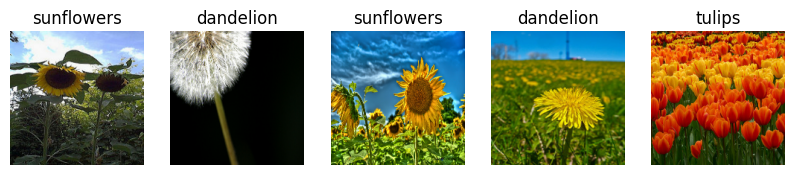

In [ ]:
plt.figure(figsize=(10,10))
for images,labels in train_dataset.take(1):
  for i in range(5):
    ax =plt.subplot(1,5,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis("off")
plt.show()


In [ ]:
# Autotune the data
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
# Normalize the data
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_dataset.map(lambda x, y: (normalization_layer(x), y))


In [ ]:
# Build a sequential CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(img_height, img_width ,3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_names))
])


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
# Train and validate the model
history = model.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=10
)


Epoch 1/10
92/92 [==============================] - 13s 41ms/step - loss: 24.5885 - accuracy: 0.3457 - val_loss: 1.2937 - val_accuracy: 0.4510
Epoch 2/10
92/92 [==============================] - 2s 20ms/step - loss: 1.1367 - accuracy: 0.5429 - val_loss: 1.3022 - val_accuracy: 0.4537
Epoch 3/10
92/92 [==============================] - 2s 20ms/step - loss: 0.7386 - accuracy: 0.7234 - val_loss: 1.2714 - val_accuracy: 0.5232
Epoch 4/10
92/92 [==============================] - 2s 20ms/step - loss: 0.4038 - accuracy: 0.8532 - val_loss: 1.6075 - val_accuracy: 0.5313
Epoch 5/10
92/92 [==============================] - 2s 23ms/step - loss: 0.2164 - accuracy: 0.9298 - val_loss: 1.6779 - val_accuracy: 0.5177
Epoch 6/10
92/92 [==============================] - 2s 23ms/step - loss: 0.1431 - accuracy: 0.9540 - val_loss: 2.2913 - val_accuracy: 0.5136
Epoch 7/10
92/92 [==============================] - 2s 20ms/step - loss: 0.0856 - accuracy: 0.9751 - val_loss: 2.4454 - val_accuracy: 0.5027
Epoch 8/10


In [ ]:
flower="/content/sunflower.webp"
from tensorflow.keras.preprocessing import image
import numpy as np

img=image.load_img(flower,target_size=(img_height,img_width))


In [ ]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)

In [ ]:
predictions=model.predict(img_array)

1/1 [==============================] - 0s 20ms/step


In [ ]:
predicted_class_index = np.argmax(predictions[0])
class_names = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']  # Define your class names
predicted_class = class_names[predicted_class_index]

# Print the predicted class
print("Predicted class:", predicted_class)

Predicted class: sunflowers
